# Project 2 - Income Qualification (New)

## DESCRIPTION
## Identify the level of income qualification needed for the families in Latin America

## Problem Statement Scenario:
Many social programs have a hard time making sure the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to classify them and predict their level of need. While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB) believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.


## Following actions to be performed:
- Identify the output variable.
- Understand the type of data.
- Check if there are any biases in your dataset.
- Check whether all members of the house have the same poverty level.
- Check if there is a house without a family head.
- Set the poverty level of the members and the head of the house same in a family.
- Count how many null values are existing in columns.
- Remove null value rows of the target variable.
- Predict the accuracy using random forest classifier.
- Check the accuracy using a random forest with cross-validation.

## Project Output

In [310]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats
from scipy.stats import chi2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

In [311]:
train = pd.read_csv(r'C:\Users\USER\Documents\BCG\ML 101\Group Project\Dataset for the project\train.csv')
test=pd.read_csv(r'C:\Users\USER\Documents\BCG\ML 101\Group Project\Dataset for the project\test.csv')

In [312]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [313]:
train.info

<bound method DataFrame.info of                 Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  \
0     ID_279628684  190000.0       0      3       0     1       1     0   
1     ID_f29eb3ddd  135000.0       0      4       0     1       1     1   
2     ID_68de51c94       NaN       0      8       0     1       1     0   
3     ID_d671db89c  180000.0       0      5       0     1       1     1   
4     ID_d56d6f5f5  180000.0       0      5       0     1       1     1   
...            ...       ...     ...    ...     ...   ...     ...   ...   
9552  ID_d45ae367d   80000.0       0      6       0     1       1     0   
9553  ID_c94744e07   80000.0       0      6       0     1       1     0   
9554  ID_85fc658f8   80000.0       0      6       0     1       1     0   
9555  ID_ced540c61   80000.0       0      6       0     1       1     0   
9556  ID_a38c64491   80000.0       0      6       0     1       1     0   

      v18q1  r4h1  ...  SQBescolari  SQBage  SQBhogar_total  SQBedj

In [314]:
train.shape

(9557, 143)

### Training Dataset Cleaning

In [315]:
train.info(143)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 143 columns):
 #    Column           Dtype  
---   ------           -----  
 0    Id               object 
 1    v2a1             float64
 2    hacdor           int64  
 3    rooms            int64  
 4    hacapo           int64  
 5    v14a             int64  
 6    refrig           int64  
 7    v18q             int64  
 8    v18q1            float64
 9    r4h1             int64  
 10   r4h2             int64  
 11   r4h3             int64  
 12   r4m1             int64  
 13   r4m2             int64  
 14   r4m3             int64  
 15   r4t1             int64  
 16   r4t2             int64  
 17   r4t3             int64  
 18   tamhog           int64  
 19   tamviv           int64  
 20   escolari         int64  
 21   rez_esc          float64
 22   hhsize           int64  
 23   paredblolad      int64  
 24   paredzocalo      int64  
 25   paredpreb        int64  
 26   pareddes         i

In [316]:
train.isna().sum() / len(train) * 100

Id                  0.000000
v2a1               71.779847
hacdor              0.000000
rooms               0.000000
hacapo              0.000000
                     ...    
SQBovercrowding     0.000000
SQBdependency       0.000000
SQBmeaned           0.052318
agesq               0.000000
Target              0.000000
Length: 143, dtype: float64

In [317]:
train.drop('Id', axis = 1, inplace = True)
train.drop('v2a1',axis = 1, inplace = True)

In [318]:
train.isna().sum()

hacdor             0
rooms              0
hacapo             0
v14a               0
refrig             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          5
agesq              0
Target             0
Length: 141, dtype: int64

In [319]:
train.isna().any()[lambda x: x]

v18q1        True
rez_esc      True
meaneduc     True
SQBmeaned    True
dtype: bool

In [320]:
train['v18q1'].isna().sum()

7342

In [321]:
train.tail(10)

,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
9547,0,5,0,1,1,0,NaN,1,2,3,...,121,529,25,4,4,5.444444,0.444444,100.0000,529,4
9548,0,5,0,1,1,0,NaN,1,2,3,...,121,324,25,4,4,5.444444,0.444444,100.0000,324,4
9549,0,5,0,1,1,0,NaN,1,2,3,...,0,4,25,4,4,5.444444,0.444444,100.0000,4,4
9550,0,3,0,1,1,0,NaN,0,1,1,...,36,3721,4,0,0,4.000000,1.000000,9.0000,3721,2
9551,0,3,0,1,1,0,NaN,0,1,1,...,0,4489,4,0,0,4.000000,1.000000,9.0000,4489,2
9552,0,6,0,1,1,0,NaN,0,2,2,...,81,2116,25,81,1,1.562500,0.062500,68.0625,2116,2
9553,0,6,0,1,1,0,NaN,0,2,2,...,0,4,25,81,1,1.562500,0.062500,68.0625,4,2
9554,0,6,0,1,1,0,NaN,0,2,2,...,25,2500,25,81,1,1.562500,0.062500,68.0625,2500,2
9555,0,6,0,1,1,0,NaN,0,2,2,...,121,676,25,81,1,1.562500,0.062500,68.0625,676,2
9556,0,6,0,1,1,0,NaN,0,2,2,...,64,441,25,81,1,1.562500,0.062500,68.0625,441,2


In [322]:
train.drop('v18q1', axis = 1, inplace = True)
train['rez_esc'].isna().sum() / len(train) * 100

82.95490216595167

In [323]:
train.drop('rez_esc', axis = 1, inplace = True)
train['meaneduc'].isna().sum()

5

In [324]:
train['meaneduc'].dtype

dtype('float64')

<AxesSubplot: xlabel='meaneduc', ylabel='Density'>

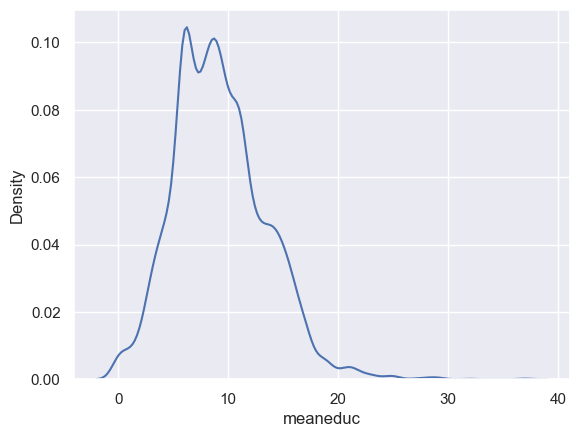

In [325]:
sns.kdeplot(train['meaneduc'])

In [326]:
train['meaneduc'].fillna(train['meaneduc'].mean, inplace = True)
train['meaneduc'].isna().sum()

0

In [327]:
train.isna().any()

hacdor             False
rooms              False
hacapo             False
v14a               False
refrig             False
                   ...  
SQBovercrowding    False
SQBdependency      False
SQBmeaned           True
agesq              False
Target             False
Length: 139, dtype: bool

In [328]:
train.groupby('Target').size() / len(train) * 100

Target
1     7.899969
2    16.710265
3    12.650413
4    62.739353
dtype: float64

In [329]:
train.describe()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,0.385895,1.559171,1.945066,0.399184,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.680779,1.036574,1.188852,0.692460,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,3.000000,1.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,5.000000,8.000000,8.000000,6.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [330]:
train.columns.isna().sum()

0

In [331]:
train.select_dtypes('object').head(100)

,idhogar,dependency,edjefe,edjefa,meaneduc
0,21eb7fcc1,no,10,no,10.0
1,0e5d7a658,8,12,no,12.0
2,2c7317ea8,8,no,11,11.0
3,2b58d945f,yes,11,no,11.0
4,2b58d945f,yes,11,no,11.0
...,...,...,...,...,...
95,14aeb8605,.66666669,no,4,6.0
96,14aeb8605,.66666669,no,4,6.0
97,14aeb8605,.66666669,no,4,6.0
98,07a5de1ba,2,no,8,8.0


In [332]:
train.select_dtypes('object').isna().sum()

idhogar       0
dependency    0
edjefe        0
edjefa        0
meaneduc      0
dtype: int64

In [333]:
train['Target'].isnull().any().any()

False

<AxesSubplot: title={'center': 'Target count'}>

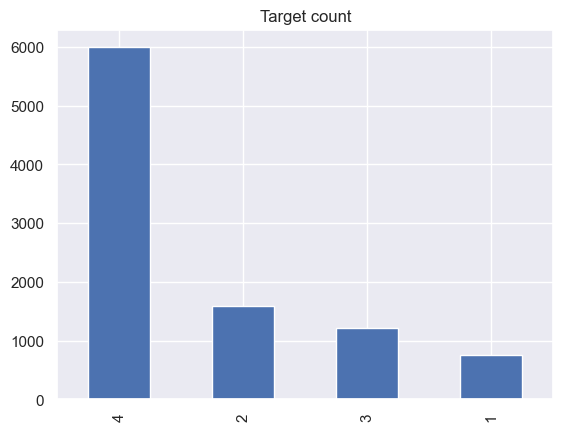

In [334]:
target_count = train['Target'].value_counts()
target_count.plot(kind = 'bar', title = 'Target count')

### Identify Output Variable

In [335]:
for i in train.columns:
    if i not in test.columns:
        print('Our Target variable is {}'.format(i))

Our Target variable is Target


In [336]:
# Identify variable with 0 variance

var_df = pd.DataFrame(np.var(train, 0), columns = ['variance'])
var_df.sort_values(by = 'variance').head(15)

print('Below are columns with variance 0.')
col = list((var_df[var_df['variance'] == 0]).index)
print(col)

Below are columns with variance 0.
['elimbasu5']


### Understand type of data

In [337]:
train.dtypes.value_counts()

int64      130
object       5
float64      4
dtype: int64

In [338]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 139 entries, hacdor to Target
dtypes: float64(4), int64(130), object(5)
memory usage: 10.1+ MB


In [339]:
# Explore diff types of datasets

for i in train.columns:
    a = train[i].dtype
    if a == 'object':
        print(i)

idhogar
dependency
edjefe
edjefa
meaneduc


### Check if there are any biases in dataset

In [340]:
train = pd.read_csv(r'C:\Users\USER\Documents\BCG\ML 101\Group Project\Dataset for the project\train.csv')
test=pd.read_csv(r'C:\Users\USER\Documents\BCG\ML 101\Group Project\Dataset for the project\test.csv')

In [341]:
contingency_tab = pd.crosstab(train['v18q'], train['v18q1'])
Observed_Values = contingency_tab.values

In [342]:
X = scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = X[3]
no_of_rows = len(contingency_tab.iloc[0:2, 0])
no_of_columns = len(contingency_tab.iloc[0, 0:2])

In [343]:
df = (no_of_rows - 1) * (no_of_columns - 1)
print('Degree of Freedom:-', df)

Degree of Freedom:- 0


In [344]:
chi_square = sum([(o - e) ** 2./e for o, e in zip(Observed_Values, Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]
print('chi-square statistic:-', chi_square_statistic)

chi-square statistic:- 0.0


In [345]:
alpha = 0.05
critical_value = chi2.ppf(q = 1 - alpha, df = df)
print('critical_value:', critical_value)

critical_value: nan


In [346]:
p_value = 1 - chi2.cdf(x = chi_square_statistic, df = df)
print('p-value', p_value)

p-value nan


In [347]:
if chi_square_statistic >= critical_value:
    print('Reject H0, there is a relationship between 2 categorical variables')
else:
    print('Retain H0, there is no relationship between 2 categorical variables')

Retain H0, there is no relationship between 2 categorical variables


In [348]:
if p_value <= alpha:
    print('Reject H0, there is a relationship between 2 categorical variables')
else:
    print('Retain H0, there is no relationship between 2 categorical variables')

Retain H0, there is no relationship between 2 categorical variables


In [349]:
contingency_tab = pd.crosstab(train['r4t3'],train['hogar_total'])
Observed_Values = contingency_tab.values

In [350]:
b = scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows = len(contingency_tab.iloc[0:2, 0])
no_of_columns = len(contingency_tab.iloc[0, 0:2])

In [351]:
df = (no_of_rows - 1) * (no_of_columns - 1)
print('Degree of Freedom:-', df)

Degree of Freedom:- 1


In [352]:
chi_square = sum([(o-e) ** 2. /e for o, e in zip(Observed_Values,Expected_Values)])
chi_square_statistic = chi_square[0] + chi_square[1]
print('chi-square statistic:-', chi_square_statistic)

chi-square statistic:- 17022.072400560897


In [353]:
alpha = 0.05
critical_value = chi2.ppf(q = 1 - alpha, df = df)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [354]:
p_value = 1 - chi2.cdf(x = chi_square_statistic, df = df)
print('p-value:', p_value)

p-value: 0.0


In [355]:
if chi_square_statistic >= critical_value:
    print('Reject H0, there is a relationship between 2 categorical variables')
else:
    print('Retain H0, there is no relationship between 2 categorical variables')

Reject H0, there is a relationship between 2 categorical variables


In [356]:
if p_value <= alpha:
    print('Reject H0,There is a relationship between 2 categorical variables')
else:
    print('Retain H0,There is no relationship between 2 categorical variables')

Reject H0,There is a relationship between 2 categorical variables


In [357]:
train.drop('r4t3', axis = 1, inplace = True)

### Check whether all members of the house have the same poverty level

In [358]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
not_equal = all_equal[all_equal != True]

In [359]:
all_equal

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [360]:
not_equal

idhogar
0172ab1d9    False
03f4e5f4d    False
0511912b6    False
078a0b6e2    False
09e25d616    False
             ...  
e65d4b943    False
efd3aec61    False
f006348ed    False
f7b421c2c    False
f94589d38    False
Name: Target, Length: 85, dtype: bool

### Check if there is a house without a family head

In [361]:
train.parentesco1.value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [362]:
pd.crosstab(train['edjefa'], train['edjefe'])

edjefe,10,11,12,13,14,15,16,17,18,19,...,21,3,4,5,6,7,8,9,no,yes
edjefa,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,96,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,399,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,72,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,52,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,120,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,188,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,113,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,76,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0


### Count how many null values are existing in columns

In [363]:
train.isna().sum().value_counts()

0       137
5         2
6860      1
7342      1
7928      1
dtype: int64

In [364]:
train['Target'].isna().sum()

0

In [365]:
float_col = []
for i in train.columns:
    a = train[i].dtype
    if a == 'float64':
        float_col.append(i)
print(float_col)

['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned']


In [366]:
train[float_col].isna().sum()

v2a1               6860
v18q1              7342
rez_esc            7928
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64

In [367]:
train['v18q1'].value_counts()

1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

In [368]:
pd.crosstab(train['tipovivi1'], train['v2a1'])

v2a1,0.0,12000.0,13000.0,14000.0,15000.0,16000.0,17000.0,20000.0,23000.0,25000.0,...,570540.0,600000.0,620000.0,684648.0,700000.0,770229.0,800000.0,855810.0,1000000.0,2353477.0
tipovivi1,,,,,,,,,,,,,,,,,,,,,
0,29,3,4,3,3,2,4,22,5,21,...,25,11,3,3,7,3,4,11,7,2


In [369]:
pd.crosstab(train['v18q1'], train['v18q'])

v18q,1
v18q1,
1.0,1586
2.0,444
3.0,129
4.0,37
5.0,13
6.0,6


In [370]:
train['v2a1'].fillna(0, inplace = True)
train['v18q1'].fillna(0, inplace = True)

In [371]:
train.drop(['tipovivi3', 'v18q', 'rez_esc', 'elimbasu5'], axis = 1, inplace = True)

In [372]:
train['meaneduc'].fillna(np.mean(train['meaneduc']), inplace = True)
train['SQBmeaned'].fillna(np.mean(train['SQBmeaned']), inplace = True)
print(train.isna().sum().value_counts())

0    138
dtype: int64


In [373]:
int_col = []
for i in train.columns:
    a = train[i].dtype
    if a == 'int64':
        int_col.append(i)
print(int_col)

['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'tamhog', 'tamviv', 'escolari', 'hhsize', 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera', 'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6', 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1', 'parentesco2', 'parentesco3', 'parentesco

In [374]:
train[int_col].isna().sum().value_counts()

0    126
dtype: int64

In [375]:
train.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

### Remove null value rows of the target variable

In [376]:
train['Target']

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64

In [377]:
train_target = train['Target'].dropna()
train_target

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64

In [378]:
train['Target'].isna().sum()

0

### Set the poverty level of the members and the head of the house same in a family

In [379]:
Poverty_level = train[train['v2a1'] !=0]

In [380]:
Poverty_level.shape

(2668, 138)

In [381]:
poverty_level = Poverty_level.groupby('area1')['v2a1'].apply(np.median)
poverty_level

area1
0     80000.0
1    140000.0
Name: v2a1, dtype: float64

In [382]:
def povert(x):
    if x < 8000:
        return('Below poverty level')
    
    elif x > 140000:
        return('Above powerty level')
    
    elif x < 140000:
        return('Below poverty level: Urban ; Above poverty level: Rural')

In [383]:
c = Poverty_level['v2a1'].apply(povert)

In [384]:
c.shape

(2668,)

In [385]:
pd.crosstab(c, Poverty_level['area1'])

area1,0,1
v2a1,,
Above powerty level,139,1103
Below poverty level: Urban ; Above poverty level: Rural,306,1081


In [386]:
X_data = train.drop('Target', axis = 1)
Y_data = train.Target
X_data_col = X_data.columns

### Predict the accuracy using random forest classifier

In [387]:
train = pd.read_csv(r'C:\Users\USER\Documents\BCG\ML 101\Group Project\Dataset for the project\train.csv')
test=pd.read_csv(r'C:\Users\USER\Documents\BCG\ML 101\Group Project\Dataset for the project\test.csv')

In [388]:
train2 = train.drop(['v2a1','v18q1', 'rez_esc'], axis = 1)
train2

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,0,6,0,1,1,0,0,2,2,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,0,6,0,1,1,0,0,2,2,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,0,6,0,1,1,0,0,2,2,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,0,6,0,1,1,0,0,2,2,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [389]:
train3 = train2.drop(['Id','idhogar', 'dependency', 'edjefe','edjefa'], axis = 1)
train3

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,0,5,0,1,1,1,0,2,2,1,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,6,0,1,1,0,0,2,2,1,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,0,6,0,1,1,0,0,2,2,1,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,0,6,0,1,1,0,0,2,2,1,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,0,6,0,1,1,0,0,2,2,1,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [390]:
train3 = train3.dropna()
train3

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,0,5,0,1,1,1,0,2,2,1,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,6,0,1,1,0,0,2,2,1,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,0,6,0,1,1,0,0,2,2,1,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,0,6,0,1,1,0,0,2,2,1,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,0,6,0,1,1,0,0,2,2,1,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [391]:
X = train3.drop(['Target'],axis=1)
y = train3['Target']

X
y

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9552, dtype: int64

In [392]:
from sklearn.model_selection import train_test_split

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [394]:
from sklearn.ensemble import RandomForestClassifier

In [395]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=1000)

In [396]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features='auto', n_estimators=10, random_state=1000)

In [397]:
preds = model.predict(X_test)
preds

array([4, 4, 3, ..., 4, 2, 4], dtype=int64)

In [398]:
print("The accuracy score is:",round(accuracy_score(y_test, preds),2))
print(classification_report(y_test, preds))

The accuracy score is: 0.89
              precision    recall  f1-score   support

           1       0.88      0.76      0.81       243
           2       0.83      0.79      0.81       484
           3       0.88      0.72      0.79       355
           4       0.91      0.98      0.94      1784

    accuracy                           0.89      2866
   macro avg       0.87      0.81      0.84      2866
weighted avg       0.89      0.89      0.89      2866



In [399]:
confusion_matrix(y_test,preds)

array([[ 184,   27,    5,   27],
       [  10,  380,   19,   75],
       [   8,   27,  255,   65],
       [   8,   25,   11, 1740]], dtype=int64)

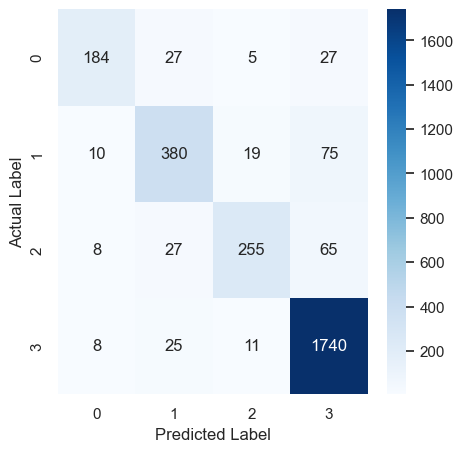

In [400]:
plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test,preds), annot=True, cmap='Blues', fmt='g');
plt.ylabel('Actual Label');
_ = plt.xlabel('Predicted Label');

### Check the accuracy using a random forest with cross-validation

#### Random Forrest with Grid Search (Set-up 1)

In [401]:
model_cv = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=1000)

In [402]:
import time
from sklearn.model_selection import train_test_split, GridSearchCV
np.random.seed(1000)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf_tree =GridSearchCV(model_cv, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3,scoring='accuracy')

cv_rf_tree.fit(X_train,y_train)
print('Best Parameters using grid search: \n',
     cv_rf_tree.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  23.25


In [403]:
model_cv.set_params(criterion = 'gini',max_features = None,max_depth = 4)

RandomForestClassifier(max_depth=4, max_features=None, n_estimators=10,
                       random_state=1000)

In [404]:
model_cv.fit(X_train,y_train)
y_pred_rf_cv=model.predict(X_test)

In [405]:
from sklearn.metrics import accuracy_score
print("The accuracy score is:",round(accuracy_score(y_test, y_pred_rf_cv),2))

The accuracy score is: 0.89


##### The accuracy score remains the same at 0.89

#### Random Forrest with Grid Search (Set-up 2)

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1000)

In [407]:
from sklearn.model_selection import GridSearchCV

In [408]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [409]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [410]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [411]:
start = time.time()

grid.fit(X_train,y_train)

end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Time taken in grid search:  376.13


In [412]:
grid.best_params_

{'bootstrap': False,
 'max_features': 4,
 'n_estimators': 100,
 'oob_score': False}

In [413]:
predictions = grid.predict(X_test)

In [414]:
confusion_matrix(y_test,predictions)

array([[112,  10,   0,   8],
       [  1, 204,   5,  36],
       [  0,   5, 136,  28],
       [  0,   4,   1, 883]], dtype=int64)

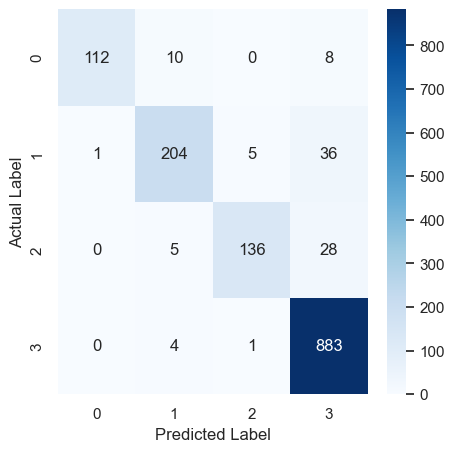

In [415]:
plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='Blues', fmt='g');
plt.ylabel('Actual Label');
_ = plt.xlabel('Predicted Label');

In [416]:
from sklearn.metrics import accuracy_score
print("The accuracy score is:",round(accuracy_score(y_test, predictions),2))

print(classification_report(y_test,predictions))

The accuracy score is: 0.93
              precision    recall  f1-score   support

           1       0.99      0.86      0.92       130
           2       0.91      0.83      0.87       246
           3       0.96      0.80      0.87       169
           4       0.92      0.99      0.96       888

    accuracy                           0.93      1433
   macro avg       0.95      0.87      0.91      1433
weighted avg       0.93      0.93      0.93      1433



##### The accuracy score increased slightly to 0.93